# Qualitative approach to topology generators

Tanya Strydom [](https://orcid.org/0000-0001-6067-1349)  
March 1, 2024

## Venn Diagram

Here we will use the standard \[REF FOR TIDYVERSE\] and @gaoGgVennDiagramIntuitiveEasytoUse2021 to create a venn diagram for the quantitative portion of or generator/model overview process. Also remember to drop the R version (maybe also look into if you can `renv` this because we aim for reproducibility)

In [ ]:
#| output: false
#| message: false
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'ggVennDiagram'

The following object is masked from 'package:tidyr':

    unite

First we need to create the df with the relevant ‘traits’ for each model

In [ ]:
#| message: false

x <- list(Niche=c("species agnostic", "structural", "synthetic network"),
          ADBM=c("node-level", "mechanistic"),
          Transfer=c("node-level", "embedding", "metaweb"),
          PFIM=c("node-level", "mechanistic", "metaweb"),
          Cascade=c("species agnostic", "structural", "synthetic network"))

venn <- Venn(x)
data <- process_data(venn)

Create venn diagram:

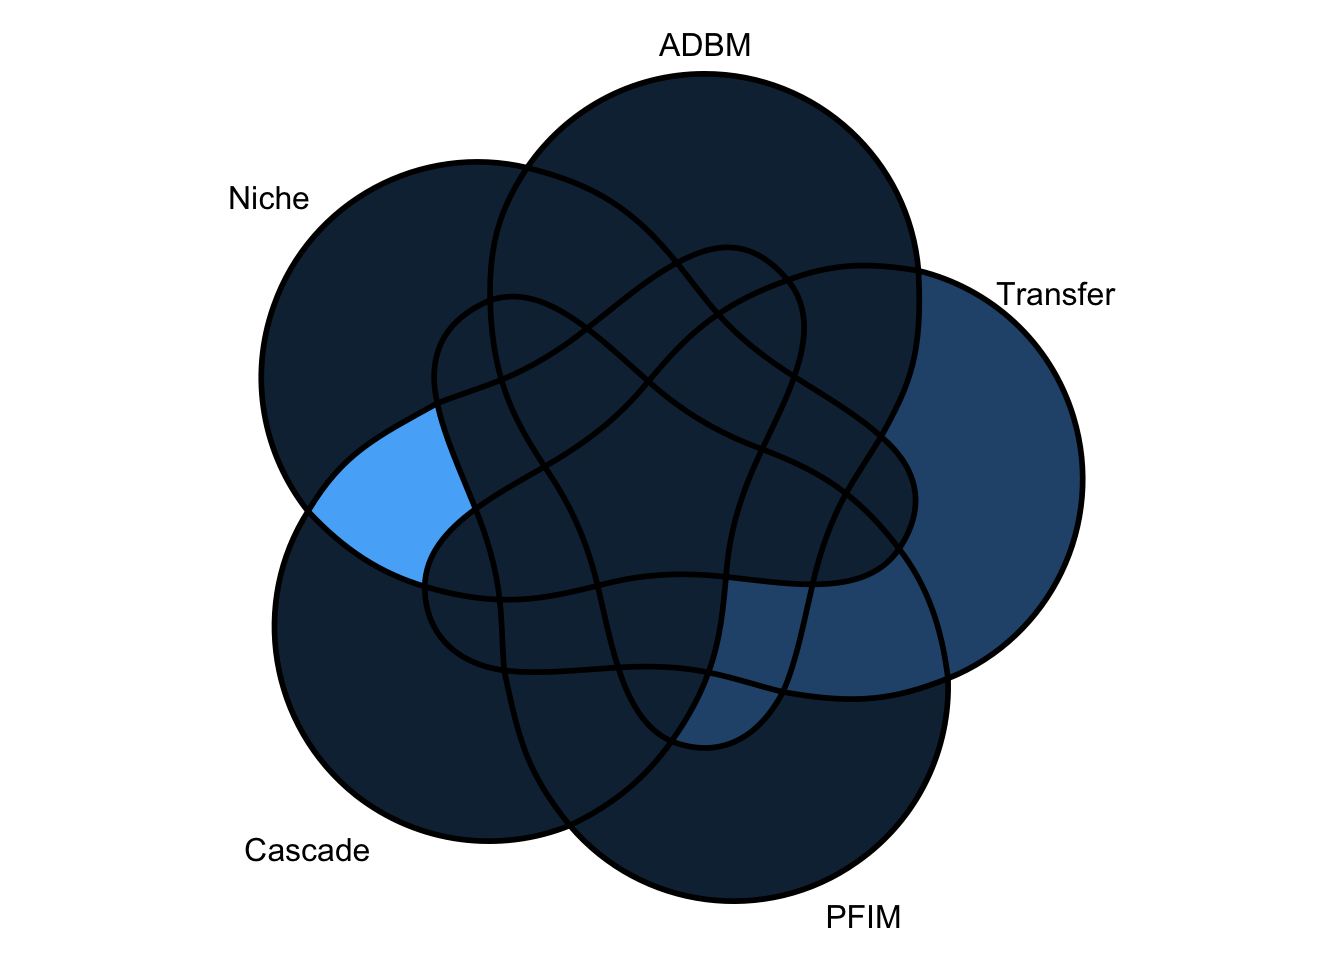

In [ ]:
#| echo: false
#| label: fig-venn
#| fig-cap: "Venn diagram for qualitative analysis/overview of the fancy maths things"
#| fig-alt: "TODO"
ggVennDiagram(x, 
              label = "none") +
  theme_void() +
  theme(legend.position = 'none')

Looking at it now I don’t think this is the wayTM and trying to sort of ‘ordinate’ modelling space might actually be more meaningful… Specifically thinking here that I need to also actually just read about model comparison (but without the performance aspect)

## Multivariate approach

So at least according to @mccuneAnalysisEcologicalCommunities2002 we should be able to ordinate using only categorical data although we should stick to an NMDS. Its just going to be a case of encoding said categories correctly. How I see it is that each category that we ‘create’ will be its own entry (we could maybe also just turn each category into a factor but this comes at the cost of assuming the distribution of said variable, well at least that’s what I infer form my 2 minute skim read).

I think what we should do is turn what is Table 1 in the manuscript into a ‘wide table’ that we can ‘simply’ throw into an NMDS to see what it throws out. Although I think we do need to think what would be deemed the /multivariate space of network generating models’…

In [ ]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Run 0 stress 6.055762e-17 
Run 1 stress 0 
... New best solution
... Procrustes: rmse 0.1648533  max resid 0.2711284 
Run 2 stress 0 
... Procrustes: rmse 0.2415503  max resid 0.3789344 
Run 3 stress 0 
... Procrustes: rmse 0.2222631  max resid 0.3377932 
Run 4 stress 0 
... Procrustes: rmse 0.1834411  max resid 0.2788241 
Run 5 stress 0 
... Procrustes: rmse 0.1086419  max resid 0.1874339 
Run 6 stress 0 
... Procrustes: rmse 0.1874631  max resid 0.2719791 
Run 7 stress 0.06335697 
Run 8 stress 0 
... Procrustes: rmse 0.2387256  max resid 0.3380424 
Run 9 stress 0 
... Procrustes: rmse 0.07659501  max resid 0.1385462 
Run 10 stress 0 
... Procrustes: rmse 0.1670454  max resid 0.2483204 
Run 11 stress 8.123983e-05 
... Procrustes: rmse 0.1041446  max resid 0.1326098 
Run 12 stress 0.07124327 
Run 13 stress 7.796157e-05 
... Procrustes: rmse 0.1459716  max resid 0.1945881 
Run 14 stress 0 
... Procrustes: rmse 0.217524  max resid 0.3558596 
Run 15 stress 0.07437737 
Run 16 stress 7.0270

Warning in metaMDS(community_matrix, k = 2): stress is (nearly) zero: you may
have insufficient data

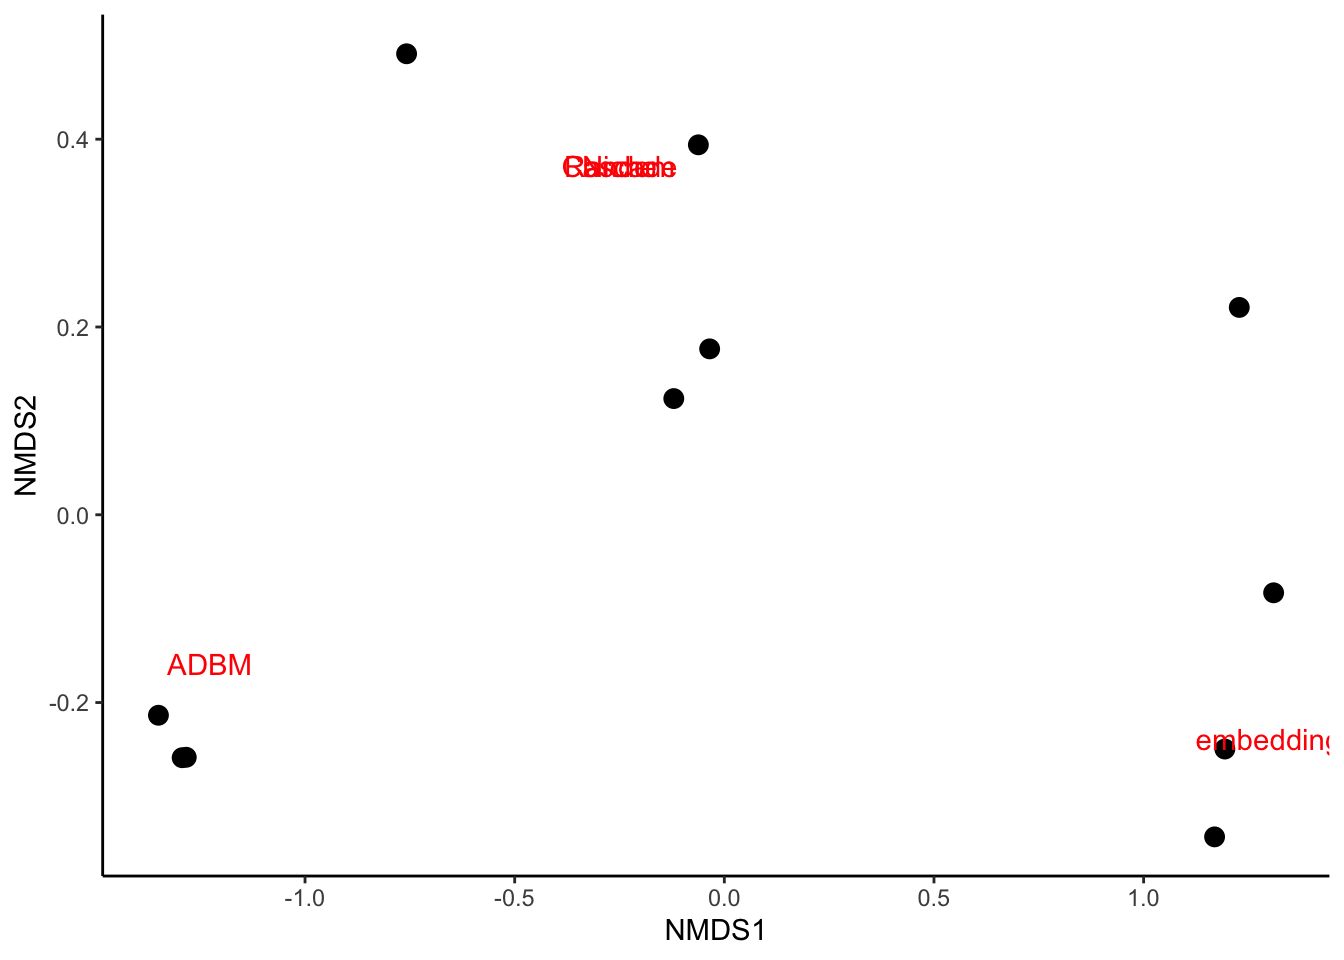

In [ ]:
#| echo: false
#| label: fig-nmds
#| fig-cap: "NMDS of things"

ggplot() + 
    geom_point(data = data.scores, 
               aes(x = NMDS1, 
                   y = NMDS2),
               size = 3,
               colour = "black") + 
    geom_text(data = data.species, 
               aes(label = row.names(data.species),
                   x = NMDS1, 
                   y = NMDS2),
               colour = "red") + 
    labs(x = "NMDS1", y = "NMDS2") +
    theme_classic()

## References